In [3]:
import jieba
import urllib.request
import matplotlib.pyplot as plt
import math
import csv

In [4]:
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def format_str(content):
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str + ｉ
    return content_str

In [5]:
# 讀檔
import csv
with open('movies2.csv', encoding = 'utf_8_sig') as csvfile:
    # 解析內容
    rows = list(csv.reader(csvfile))

In [6]:
test = []
train = []
for movie in rows[1:]:
    for i in movie:
        if i =='':
            del i
    if len(test) < 500:
        test.append(movie)
    else:
        train.append(movie)
temp = ''
#只取第一個分類
for movie in test:
    i=3
    while i<23:
        tmp = movie[i]
        if movie[i] != '':
            movie[3] = tmp
            i=22
        i = i+1

for movie in train:
    i=3
    while i<23:
        tmp = movie[i]
        if movie[i] != '':
            movie[3] = tmp
            i=22
        i = i+1
print(test[0])
print(train[0])

['0', '一世狂野', '2001/10/12', '劇情', '', '', '', '劇情', '犯罪', '', '', '', '', '', '', '', '', '歷史/傳記', '', '', '', '', '', '', '             喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是他卻不願像他父親那樣一輩子都只是個出賣勞力的建築工人。於是他搬到陽光明媚的加州，靠著販賣大麻賺錢，起初，他販毒只是為了享受自由自在的生活，但是當他野心越來越大，他的勢力也日益坐大之際，卻在此時被捕入獄。 他在牢裡認識一個能言善道，自稱熟識哥倫比亞販毒集團的牢友狄亞哥，他出獄後果真把當時勢力最大的毒梟艾斯科巴介紹給喬治認識，艾斯科巴計畫將古柯鹼大量引進美國的迪斯可舞廳，希望能引領一股吸毒狂歡的風潮。除了毒品供應商之外，狄亞哥也介紹了一個美艷又狂野的女人瑪莎給喬治，他們瘋狂相愛，之後馬莎還替他生下一個可愛的女兒克莉絲汀娜，也是喬治一生的最愛。喬治很快就靠著販毒發大財，他還得買一棟大房子專門存放每天賺進來的大把鈔票，但是日進斗金卻整天提心吊膽的生活卻讓喬治開始省思，到底他要繼續過著揮霍富裕的生活，還是為了自己心愛的女兒應該轉性投資正當的事業？可是這時聯邦調查局的探員，也開始盯上毒源禍首的喬治……           ']
['500', '浪漫醫生', '2001/5/26', '劇情', '', '', '', '劇情', '', '', '', '喜劇', '愛情', '', '', '', '', '', '', '', '', '', '', '', '             李察基爾在這部充滿溫馨的喜劇電影中飾演一個百分百的男人，一輩子生活在溫柔鄉中，享受著甜蜜的愛情，令世間的男人羨慕不已。原來李察基爾是美國一個富有而成功的婦科醫生，圍繞在他工作及家庭周圍的都是女人，他成天沐浴在女人世界裡，他的宗教信仰是女人，他崇拜的也是女人，他把一切都貢獻給了女人。可是接踵而來的卻是一大堆有關女人的煩惱；先是診所裡排得過於擁擠的醫療行程令他疲累不堪；接著是太太為了張羅女兒的婚事讓全家變得緊張兮兮；最後又是小姨子帶了三個女兒借宿在他家，這使得一向平靜的家中憑添了許多煩惱事。李察基爾為了刻意躲避這些女人經，決心遠離塵世，驅車前往鄉間高爾夫俱樂部避

In [7]:
sort = ['溫馨/家庭', '動作', '劇情', '戲劇', '恐怖', '影展', '犯罪', '愛情', '冒險', '紀錄片', '武俠', '動畫', '勵志', '戰爭', '音樂/歌舞', '歷史/傳記', '科幻', '奇幻', '懸疑/驚悚', '喜劇']

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import math
from sklearn.preprocessing import normalize

In [9]:
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2')
Introduction = []
for i in test:
    Introduction.append(i[24])
for i in train:
    Introduction.append(i[24])
tfidf = vectorizer.fit_transform(Introduction)
tfidf = tfidf.toarray()

In [10]:
df_tfidf = pd.DataFrame(tfidf,columns=vectorizer.get_feature_names(), index=range(len(Introduction)))
df_tfidf

,0,00,000名以上索馬利亞暴民的猛烈攻擊,000尺有一件木製建築物,000的山峰,011,02,03,04,05,...,龍馬,龐帝基亞是義大利當代最偉大的作家與評論家之一,龐德一路從香港,龐德於是遭北韓軍隊囚禁,１９５４年在熱拿亞船塢建造的巨型遊輪,ｋｎｂ特效菁英製作公司來處理特殊效果的部份,ｐａｘ星球,ｐａｘ星球的不同,ｐａｘ的遙遠星球,ｘ戰警
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train = []
for movie in train:
    for i in range(len(sort)):
        if movie[3] == sort[i]:
            y_train.append(i)

In [12]:
X_train = list(tfidf[500:])
X_test = list(tfidf[:500])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#從k值=1開始測試25的正確率最高
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error

<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error_rate.append(np.mean(pred_i != y_test))
<ipython-input-18-8b4e207ca93b>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  error

Text(0, 0.5, 'Error Rate')

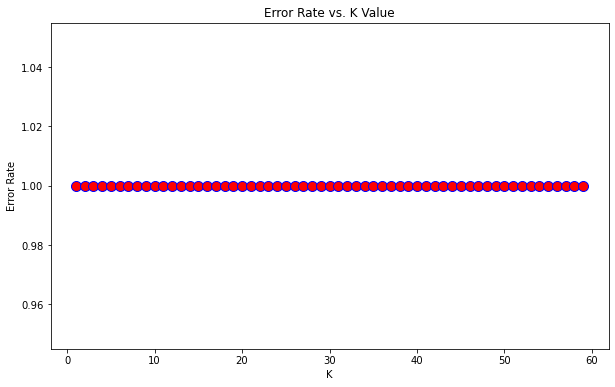

In [18]:
import numpy as np
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
y_test = []

for i in pred:
    y_test.append(sort[i])

In [15]:
correct = 0
for i in range(500):
    if y_test[i] == test[i][3]:
        correct = correct + 1

accuracy = correct / 500
print('accuracy:',accuracy)

accuracy: 0.412


In [16]:
for i in range(10):
    print(test[i][1])
    print('first sort:', test[i][3])
    print('pred:', y_test[i])

一世狂野
first sort: 劇情
pred: 劇情
玩命關頭
first sort: 動作
pred: 劇情
戰雲密佈
first sort: 動作
pred: 劇情
騎士風雲錄
first sort: 動作
pred: 劇情
金法尤物
first sort: 喜劇
pred: 劇情
瘋狂世界
first sort: 冒險
pred: 劇情
震撼教育
first sort: 劇情
pred: 動作
神鬼第六感
first sort: 劇情
pred: 劇情
觸不到的戀人
first sort: 奇幻
pred: 劇情
北京樂與路
first sort: 劇情
pred: 劇情
